Data diolah sehingga menampilkan dataframe untuk memudahkan pengguna melihat kolom dari file excel yang akan digunakan.

In [4]:
import pandas as pd
from IPython.display import display

df = pd.read_excel('Inflasi Dari BI.xlsx') # membaca file excel ke dalam DataFrame
display(df) # menampilkan DataFrame sebagai tabel

,No,Tanggal,Data Inflasi (dalam persen)
0,1,2003-01-01,8.68
1,2,2003-02-01,7.60
2,3,2003-03-01,7.17
3,4,2003-04-01,7.62
4,5,2003-05-01,7.15
...,...,...,...
240,241,2023-01-01,5.28
241,242,2023-02-01,5.47
242,243,2023-03-01,4.97
243,244,2023-04-01,4.33


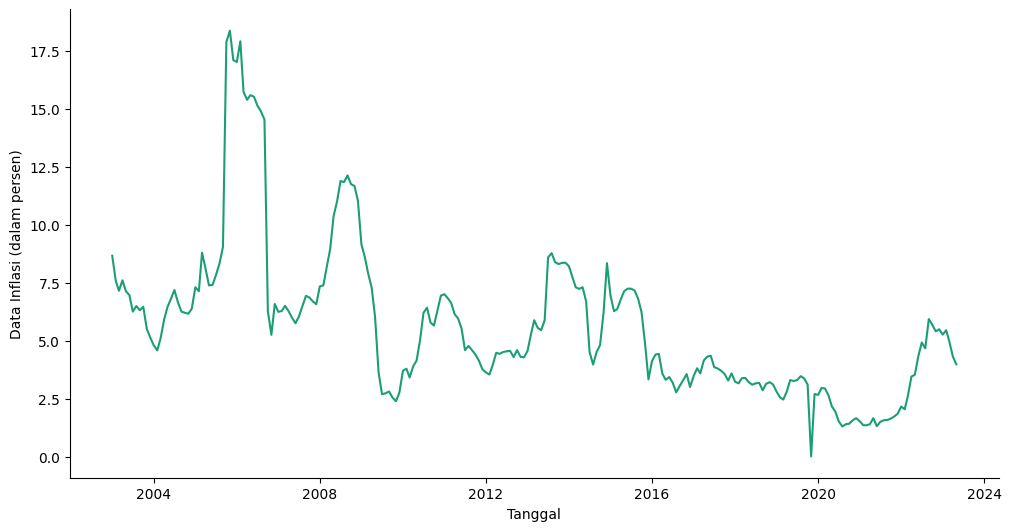

In [ ]:
# @title Tanggal vs Data Inflasi (dalam persen)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['Data Inflasi (dalam persen)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Tanggal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('Data Inflasi (dalam persen)')

In [ ]:
import numpy as np
import pandas as pd

def time_series_generator(data, trend_slope, seasonality_period, seasonality_amplitude):
    n = len(data)
    for t in range(n):
        trend = trend_slope * t
        seasonality = seasonality_amplitude * np.sin(2 * np.pi * t / seasonality_period)
        yield trend + seasonality + data[t]

def read_excel(file_path, column_name):
    data = pd.read_excel(file_path)
    data = data[column_name].tolist()  # mengambil kolom yang diinginkan dan ubah ke dalam list
    return data

def main():
    print("======== Selamat datang di TimeSeries IndoTrends! =======\n")
    file_path = input("Masukkan path file Excel (XLSX): ")
    column_name = input("Masukkan nama kolom data yang akan digunakan: ")
    data = read_excel(file_path, column_name)

    trend_slope = float(input("Masukkan kecepatan pertumbuhan tren: "))
    seasonality_period = float(input("Masukkan periode musiman: "))
    seasonality_amplitude = float(input("Masukkan amplitudo musiman: "))

    # memanggil fungsi generator untuk menghasilkan data time series dengan komponen trend dan musiman
    time_series = time_series_generator(data, trend_slope, seasonality_period, seasonality_amplitude)

    print("\nData Time Series hasil pengolahan:")
    for item in time_series:
        print(item)

if __name__ == "__main__":
    main()


======== Selamat datang di TimeSeries IndoTrends! =======

Masukkan path file Excel (XLSX): /content/Inflasi Dari BI.xlsx
Masukkan nama kolom data yang akan digunakan: Data Inflasi (dalam persen)
Masukkan kecepatan pertumbuhan tren: 0.5
Masukkan periode musiman: 12
Masukkan amplitudo musiman: 2

Data Time Series hasil pengolahan:
8.68
9.1
9.902050807568877
11.120000000000001
10.882050807568877
10.48
9.27
9.01
8.597949192431123
8.98
8.797949192431123
9.66
10.82
12.1
13.842050807568878
15.42
16.202050807568877
16.33
16.2
15.170000000000002
14.537949192431123
14.719999999999999
15.447949192431121
16.9
19.32
20.650000000000002
23.542050807568877
23.619999999999997
23.13205080756888
22.92
22.840000000000003
22.830000000000002
23.327949192431127
32.39
33.64794919243112
33.61
35.03
37.42
36.47205080756888
36.9
37.332050807568876
37.03000000000001
36.15
35.400000000000006
34.81794919243113
26.79
26.537949192431117
29.1
30.259999999999998
31.799999999999997
33.25205080756888
33.79
33.7420508075

,Time Series
0,8.680000
1,9.100000
2,9.902051
3,11.120000
4,10.882051
...,...
240,125.280000
241,126.970000
242,127.702051
243,127.830000


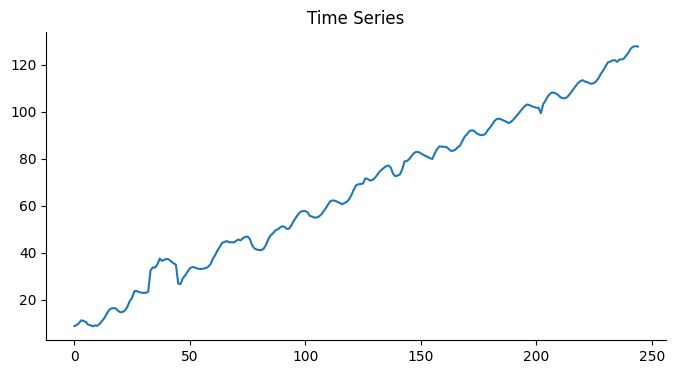

In [ ]:
import pandas as pd
from IPython.display import display
# Membaca file teks (txt) ke dalam DataFrame
df = pd.read_csv('data saya.txt', sep='\t')  # Ubah 'nama_file.txt' sesuai dengan nama file teks Anda
# Menampilkan DataFrame sebagai tabel
display(df)
# @title Time Series
from matplotlib import pyplot as plt
df['Time Series'].plot(kind='line', figsize=(8, 4), title='Time Series')
plt.gca().spines[['top', 'right']].set_visible(False)